> Le TP final à réaliser seul ou en groupe de 4 maximum, comme vous le souhaitez.
>
> Pour le retour, vous nommerez votre fichier avec les noms de l'ensemble des participants `TP2_nom1_nom2.ipynb` et vous ferez bien apparaître les noms et prénoms de chacun dans la première cellule du fichier.
>
> Il y aura un seul fichier par groupe.

# TP

In [300]:
# Chantrel, Dorian
# Henry, Ronan
# Blier, Evan
# Jenouvrier, Hugo

## Création et évaluation d'un jeu de données d'exemple

Lors d'un processus industriel on cherche à classer des objets compris dans un certain intervalle de ratio poids/taille.

$$taille \in [[0, 10000]]$$

$$poids \in [[0, 1000]]$$

Les valeurs souhaitées sont comprises entre les deux droites d'équation:
$$ poids = taille/6-300 $$ 
$$ poids = -taille/6+1200 $$


### Création du jeu de données

Créez un jeu de données synthétiques représentant ce problème

In [301]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

Point = namedtuple('Point', 'taille poids')

np.random.seed(42)
taille_values = np.random.uniform(0, 10000, 1000)
poids_values = np.random.uniform(0, 1000, 1000)

Créez un ensemble d'entraînement de 1000 points.

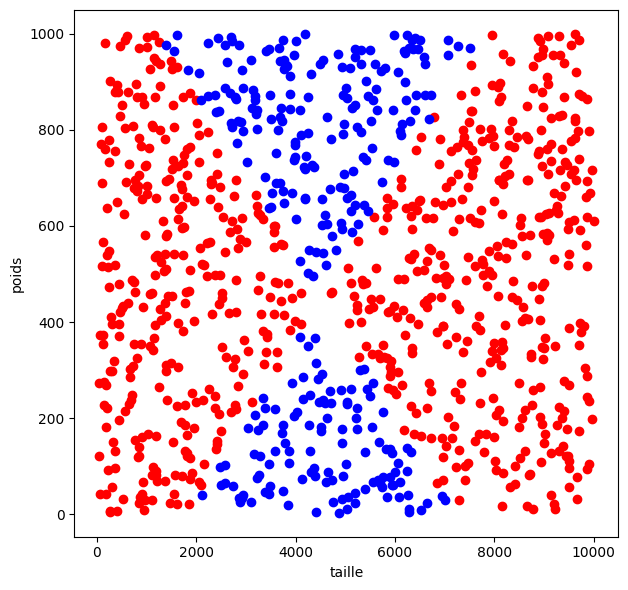

In [302]:
points = [Point(taille, poids) for taille, poids in zip(taille_values, poids_values)]

inside_points = []
outside_points = []

for point in points:
    if (point.poids > point.taille / 6 - 300 and point.poids < -point.taille / 6 + 1200) or \
       (point.poids < point.taille / 6 - 300 and point.poids > -point.taille / 6 + 1200):
        inside_points.append(point)
    else:
        outside_points.append(point)

taille_inside = [p.taille for p in inside_points]
poids_inside = [p.poids for p in inside_points]
taille_outside = [p.taille for p in outside_points]
poids_outside = [p.poids for p in outside_points]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(taille_inside, poids_inside, color='red', label='Inside')
plt.scatter(taille_outside, poids_outside, color='blue', label='Outside')
plt.xlabel('taille')
plt.ylabel('poids')

plt.tight_layout()
plt.show()

Visualisation de l'objectif:

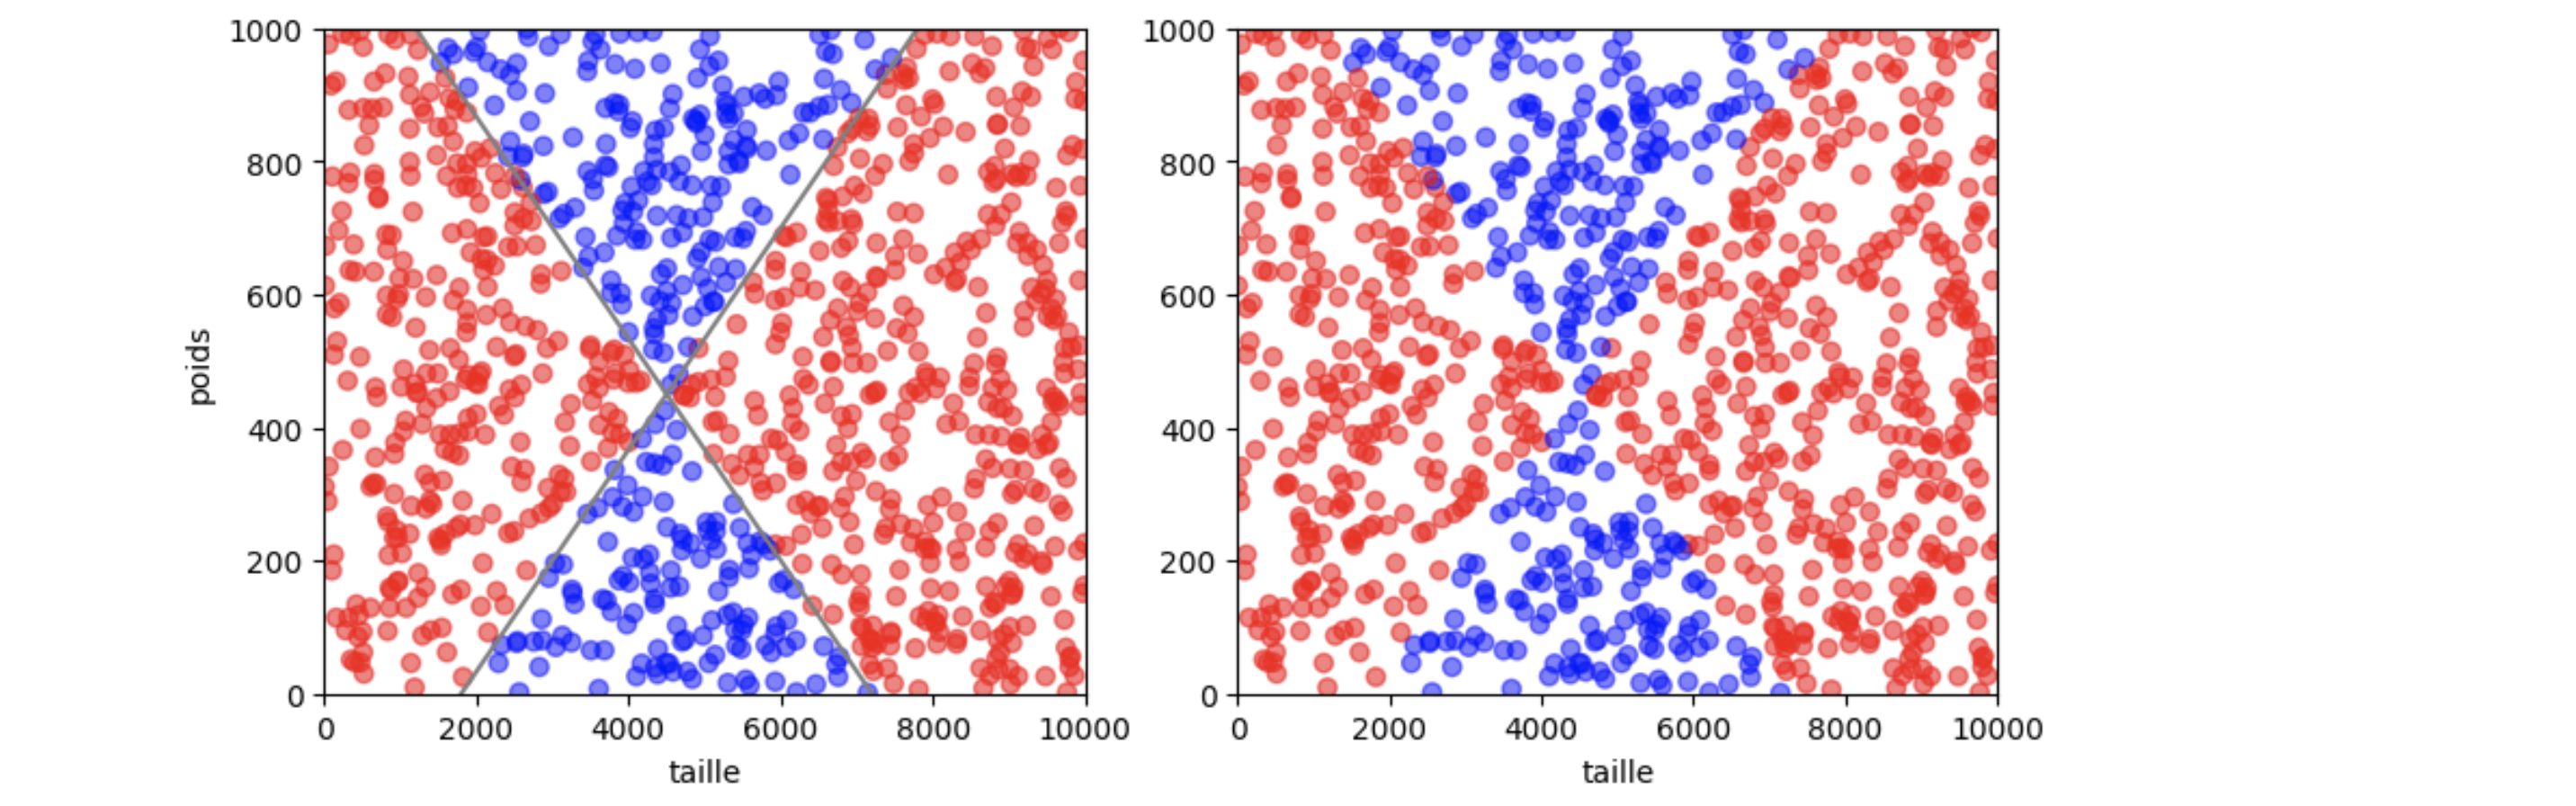

### Evaluation du jeu de données

Séparer les données en jeu de test et jeu d'entraînement.

Taille du jeu d'entraînement: 800
Taille du jeu de test: 200


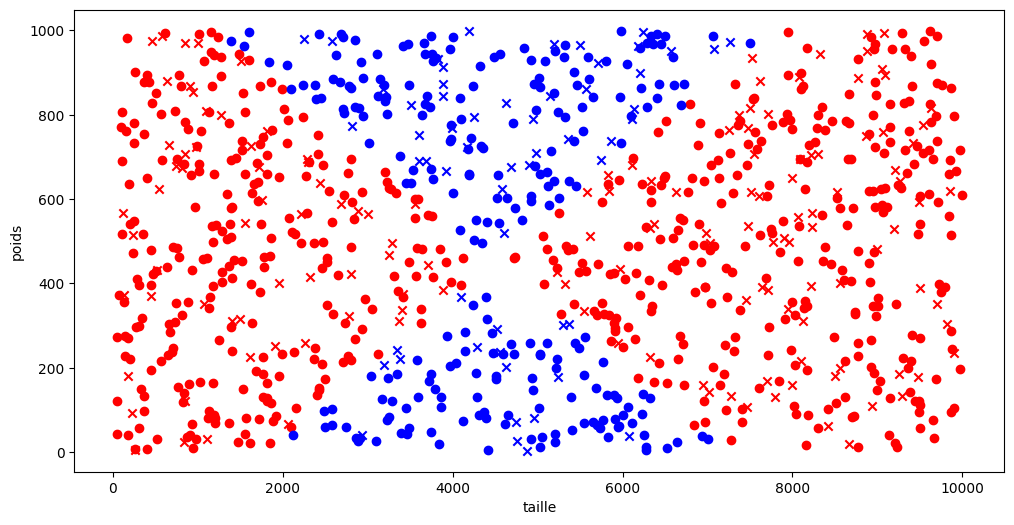

In [303]:
X = np.array([[p.taille, p.poids] for p in inside_points + outside_points])
y = np.array([1] * len(inside_points) + [0] * len(outside_points))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille du jeu d'entraînement: {X_train.shape[0]}")
print(f"Taille du jeu de test: {X_test.shape[0]}")

plt.figure(figsize=(12, 6))

plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='red')
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='blue')
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='red', marker='x')
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='blue', marker='x')

plt.xlabel('taille')
plt.ylabel('poids')

plt.show()

knn et arbre de décision de hauteur 3, quel est le meilleur algorithme?

In [313]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from ISLP import load_data

caravan = load_data('Caravan')

train_data, test_data = train_test_split(caravan, test_size=0.2, random_state=42)

X_train = train_data.drop(columns='Purchase')
y_train = train_data['Purchase']
X_test = test_data.drop(columns='Purchase')
y_test = test_data['Purchase']

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f"Précision du modèle k-NN: {accuracy_knn}")
print(f"Précision du modèle Arbre de décision (hauteur 3): {accuracy_tree}")

Précision du modèle k-NN: 0.9287553648068669
Précision du modèle Arbre de décision (hauteur 3): 0.9304721030042918


On remarque que l'Arbre de décision est plus performant (kNN = 5 voisins et Arbre de décisions = hauteur 3).

A quelle hauteur faudrait-il créer l'arbre pour avoir le meilleur résultat possible

Il faudrait rester à la hauteur 3 pour avoir le meilleur résultat possible

### Ajout de bruit (bonus)

Bonus: Ajout de bruit. Lors du recueil de données initiales, certaines valeurs sont erronées. Modifier le jeu de données d'entraînement pour ajouter un certain pourcentage de valeurs qui ne sont pas classées correctement.

Ces valeurs pourront être placées aléatoirement ou mieux mais plus difficile être placées proches des lignes de séparation. Vous pouvez prendre une distribution uniforme dans un premier temps .

Représentez graphiquement votre nouveau jeu de données.

Quel impact sur l'évaluation de votre jeu de test, si on garde le jeu de test initial (càd que l'on est sûr de la classification des objets), si on en fait un nouveau avec l'ensemble des données nouvellement créées (dans ce cas, il y a aussi des erreurs dans le jeu de test, plus proche de la réalité, mais plus compliqué à gérer.).

Avoir des bruits est plus réaliste dans notre cas, car ce n'est pas forcément vrai ou faux. Cela va par contre impacter négativement les résultats parce qu'ils vont contenir des faux-vrais et des vrais-faux. Le code va donc être complexifié pour permettre le moins d'erreur possible…

Visualisation de l'objectif, ajout de bruit:

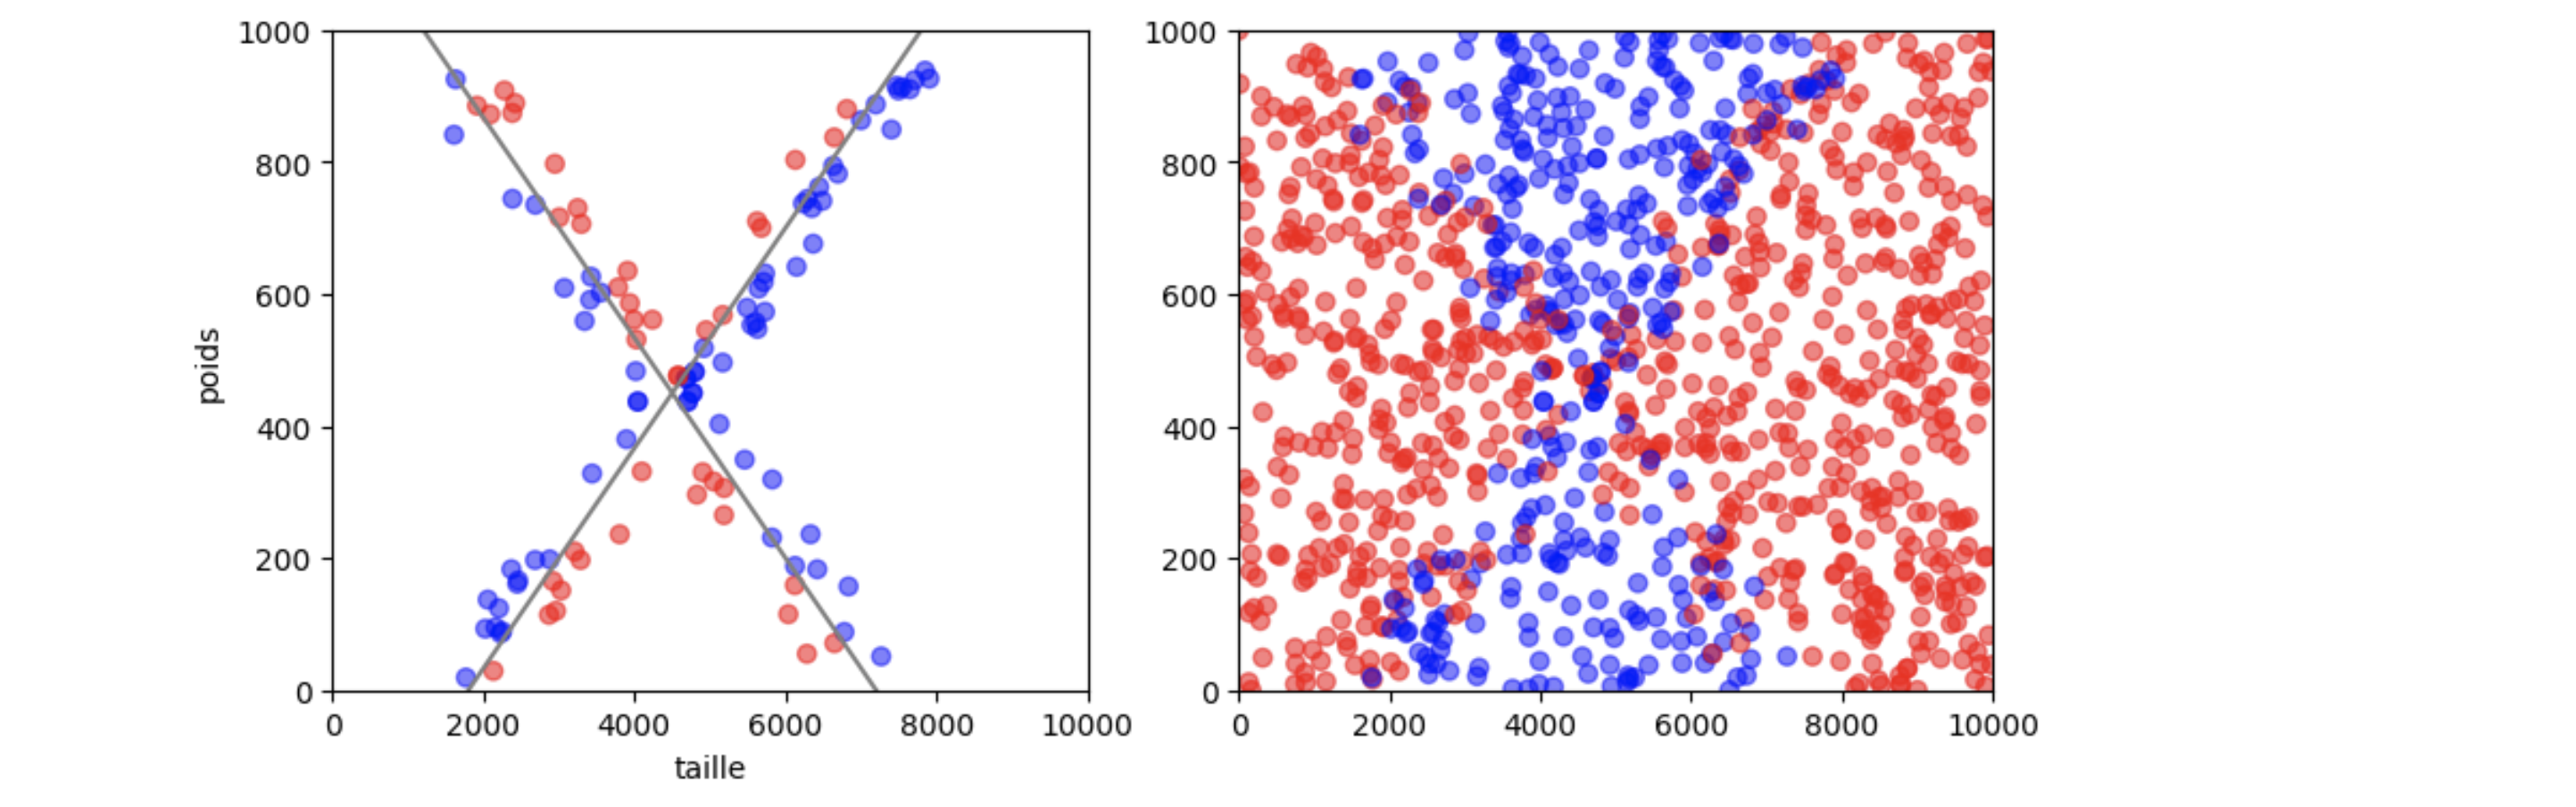

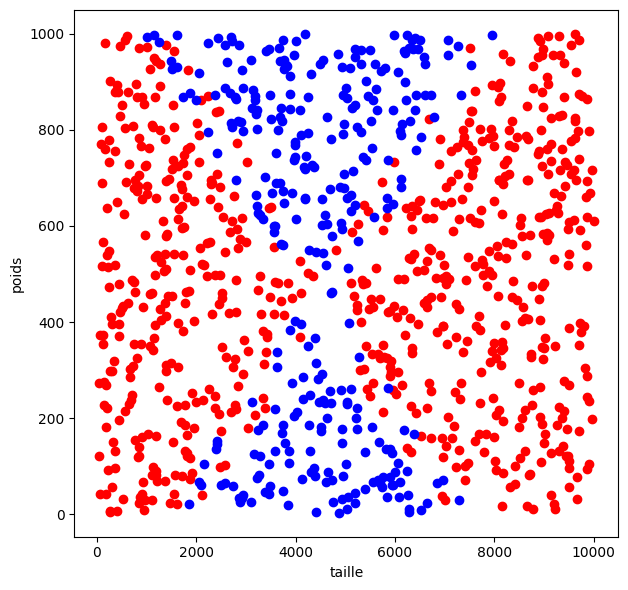

In [305]:
def distance_to_line(x, y, a, b):
    return abs(y - a*x - b) / np.sqrt(1 + a**2)

pourcentage_bruit = 0.1
nombre_points_bruit = int(len(taille_values) * pourcentage_bruit)
distances = np.minimum(
    distance_to_line(taille_values, poids_values, 1/6, -300),
    distance_to_line(taille_values, poids_values, -1/6, 1200)
)
indices_bruit = np.argsort(distances)[:nombre_points_bruit]

etiquettes = np.array([
    1 if (poids > taille / 6 - 300 and poids < -taille / 6 + 1200) or 
         (poids < taille / 6 - 300 and poids > -taille / 6 + 1200) else 0
    for taille, poids in zip(taille_values, poids_values)
])

etiquettes[indices_bruit] = 1 - etiquettes[indices_bruit]

points_valides = (taille_values[etiquettes == 1], poids_values[etiquettes == 1])
points_invalides = (taille_values[etiquettes == 0], poids_values[etiquettes == 0])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(points_valides[0], points_valides[1], color='red')
plt.scatter(points_invalides[0], points_invalides[1], color='blue')
plt.xlabel('taille')
plt.ylabel('poids')

plt.tight_layout()
plt.show()

## Mise en pratique sur un jeu de données classique

[Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)

Informations Complémentaires

Les caractéristiques sont calculées à partir d'une image numérisée d'une aspiration à l'aiguille fine (FNA) d'une masse mammaire.   Ils décrivent les caractéristiques des noyaux cellulaires présents dans l’image. Quelques images peuvent être trouvées sur http://www.cs.wisc.edu/~street/images/

In [306]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

[load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

In [307]:
X, y = load_breast_cancer(return_X_y=True)

In [308]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [309]:
y[0]

0

### kNN

Un exemple d'utilisation de kNN.

Quelle mesure utiliseriez vous pour évaluer les résultats de votre algorithme. Expliquer votre choix en fonction du contexte du jeu de données.

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Précision du modèle k-NN: {accuracy_knn}")

cm = confusion_matrix(y_test, y_pred_knn)
print(f"Matrice de confusion : {cm}")

report = classification_report(y_test, y_pred_knn)
print(f"\nRapport de classification : {report}")

Précision du modèle k-NN: 0.956140350877193
Matrice de confusion : [[38  5]
 [ 0 71]]

Rapport de classification :               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



Précision (Accuracy) :
Fournis une mesure générale de la précision.

Matrice de confusion :
Fournis une vue détaillée des types d'erreurs (faux positifs et faux négatifs).

Rapport de classification :
Inclus des mesures comme la précision, le rappel et le F1-score pour chaque classe, ce qui donne une vue plus complète de la performance du modèle.

Il faut mesurer combien de prédictions sont correctes sur l'ensemble des prédictions. Dans le contexte médical,  pour le cancer du sein, il faut choisir une mesure qui prenne en compte les erreurs possibles (faux positifs et faux négatifs).  Ces erreurs peuvent avoir des conséquences graves
Nous utilisons le F1-score, car nous devons prendre en compte les faux positifs et les faux négatifs de manière équilibrée

### Decision Tree

Un exemple d'utilisation d'arbre de décision.

Evaluer les résultats de votre algorithme. Utilisez vous la même métrique que dans le cas précédent? Pourquoi?

In [311]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Précision du modèle decision tree: {accuracy_tree}")

cm_tree = confusion_matrix(y_test, y_pred_tree)
print(f"Matrice de confusion : {cm_tree}")

report_tree = classification_report(y_test, y_pred_tree)
print(f"\nRapport de classification : {report_tree}")

Précision du modèle decision tree: 0.9385964912280702
Matrice de confusion : [[40  3]
 [ 4 67]]

Rapport de classification :               precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



Nous utilisons les mêmes métriques pour évaluer les deux algorithmes. Elles permettent de voir les performances du modèle sous différents aspects. Le but d'utiliser les mêmes métriques est de pouvoir comparer les performances entre les deux algorithmes, KNN et l'arbre de décision, et voir quel modèle est le plus performant.

### Exploration

Comment améliorer les résultats. Proposez une méthodologie et évaluez si vous arrivez à faire mieux que les premiers essais.

In [312]:
criterions = ['gini', 'entropy', 'log_loss']
max_depths = [3, 5, 10, 15, 20, None]

# Stocker les résultats
results = []

for criterion in criterions:
    for max_depth in max_depths:
        classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)
        classifier.fit(X_train, y_train)

        y_test_pred = classifier.predict(X_test)
        
        precision = precision_score(y_test, y_test_pred)
        results.append((precision, criterion, max_depth))

sorted_results = sorted(results, reverse=True, key=lambda x: x[0])
best_precision, best_criterion, best_max_depth = sorted_results[0]

print(f"Meilleure précision: {best_precision:.2f} avec criterion={best_criterion} et max_depth={best_max_depth}")

best_classifier = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, random_state=42)
best_classifier.fit(X_train, y_train)

y_pred_best = best_classifier.predict(X_test)

cm_best = confusion_matrix(y_test, y_pred_best)
print(f"\nMatrice de confusion (meilleur modèle) : {cm_best}")

report_best = classification_report(y_test, y_pred_best)
print(f"\nRapport de classification (meilleur modèle) : {report_best}")

Meilleure précision: 0.96 avec criterion=gini et max_depth=5

Matrice de confusion (meilleur modèle) : [[40  3]
 [ 3 68]]

Rapport de classification (meilleur modèle) :               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

